# Final Project Submission


* Student name: Milena Afeworki
* Student pace: Full time
* Scheduled project review date/time: May 7, 2021 @ 1:00pm PT 
* Instructor name: Abhineet Kulkarni
* Blog post URL: TBD


## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Questions and Recommendations

* Which genres generate the highest revenue per movie?
* Who are the top 10 directors and writers knows for those highest revenue       genres?
* What is the ideal financial level of investment on movie production?

In this next step I am going to import all the necessary libraies and packages that I may need. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from glob import glob
%matplotlib inline


Next I will explore the folder I have on file to extract the files and will also display the first 5 rows of each table to look at the data I have available to carry out my analysis and decide on which table to use for each question.

In [2]:
folder = "C:/Users/milen/Flatiron-April05/Final_Project1/movie-exploration/zippedData/"
os.listdir(folder)

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [3]:
csv_files = glob(f"{folder}*.csv*")

In [4]:
# Here is a code to load in files and display preview

tables = {}


for file in csv_files:
    ## Save a variable-friendly version of the file name
    table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
    print('====================='*5)
    
    ## Load and preview dataframe
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()

Preview of zippedData\bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Preview of zippedData\imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



Preview of zippedData\imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



Preview of zippedData\imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



Preview of zippedData\imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



Preview of zippedData\imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"



Preview of zippedData\imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



Preview of zippedData\tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



Preview of zippedData\tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Description of each table and column content

* **imdb_title_crew** : title id linked to crew id
* **tmdb_movies** : titles and stats from IMDB
* **imdb_title_akas** : link between id and movie title
* **imdb_title_ratings** : link between title and IMDB ratings
* **imdb_name_basics** : name of cast and ids
* **imdb_title_basics** : movie title, title id, start year and runtime
* **tn_movie_budgets** : movie title, release date, and earnings/costs
* **bom_movie_gross** : movie title, studio, and earnings
* **imdb_title_principals** : link between movie title, cast id and their category

In [5]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

## Question 1. Which genres generate the highest revenue per movie?

Looking at the revenue returns for different genre can give us an idea of what people are more likely to be interested on. For this analysis I will explore the 'tn_movie_budgets_gz' file to get an insight on:
 * do some genres earn more revenue than others?
 * how is the production budget related to the revenue return of those genres?

## Cleaning the data.

In [6]:
#csv to the dataframe. 
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz']

In [7]:
type(movie_budgets_df)

pandas.core.frame.DataFrame

In [8]:
movie_budgets_df.shape

(5782, 5)

In [9]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [11]:
# Checking if our data frame has any null values
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [12]:
# make a note of the percentage of the earnings/cost of each movie.
for col in movie_budgets_df:
    print(col)
    print(movie_budgets_df[col].value_counts(normalize = True)[:5])
    print("==============================================")

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
movie
King Kong         0.000519
Halloween         0.000519
Home              0.000519
Serenity          0.000346
Fantastic Four    0.000346
Name: movie, dtype: float64
production_budget
$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64
domestic_gross
$0             0.094777
$8,000,000     0.001557
$7,000,000     0.001211
$2,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64
worldwide_gross
$0            0.063473
$8,000,000    0.001557
$2,000,000    0.001038
$7,000,000    0.001038
$4,000,000    0.000692
Name: worldwide_gross, dtype: float64


In [13]:
# I will have to change the data types of the cost/earn columns and change to integer.
# write a function for that

def convert_amt_to_int(df, col):
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(np.int64)
#     df[col] = df[col].replace("$", "").replace(",", "").astype(np.int64)
    return df

In [14]:
#making a list of all the cols where we want to change the dtype 

money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [15]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [16]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [17]:
#confirming no na values
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
#looking at the most occuring values to see if there are any weird values
for col in movie_budgets_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_budgets_df[col].value_counts(normalize = True)[:5]}')
    print("-------------------")

Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
-------------------
Viewing values in col: movie
Top 5 values:
King Kong         0.000519
Halloween         0.000519
Home              0.000519
Serenity          0.000346
Fantastic Four    0.000346
Name: movie, dtype: float64
-------------------
Viewing values in col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-------------------
Viewing values in col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-------------------
Viewing values in col: worldwide_gross
Top 5 values:
0          0.063473
8000000    0.001557
7000000    0.0010

## Creating new Column for Gross Profit


In [19]:
# Now that I know the dataframe is clean  I will get the required difference column 
# so I can start working on the logic needed to get the top 5 grossing movies.
# As we have the production budget available, we can create a new column which will have the profits the movie has made.


movie_budgets_df['budget_gross_diff'] = movie_budgets_df['worldwide_gross'] - \
                                        movie_budgets_df['production_budget']
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [20]:
# arranging in order to obtain top 50 most grossing films
movie_budgets_df = movie_budgets_df.sort_values(by='budget_gross_diff', ascending=False)

In [21]:
movie_budgets_df.shape

(5782, 6)

In [22]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


In [23]:
movie_budgets_df_top50 = movie_budgets_df[:50]

In [24]:
movie_budgets_df_top50.shape

(50, 6)

In [25]:
movie_budgets_df_top50.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


## Visualizing Gross Profit

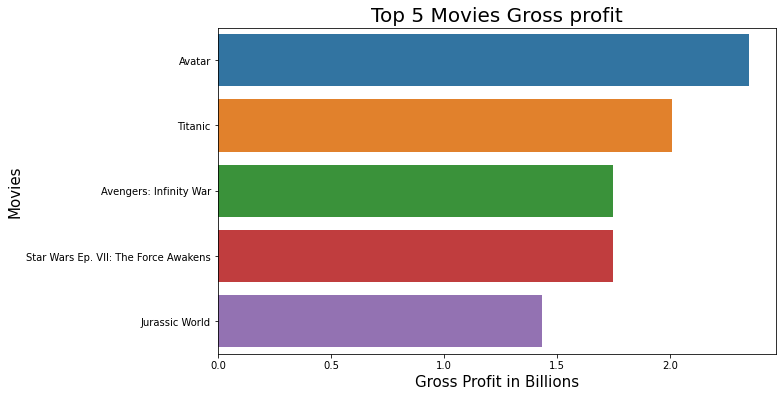

In [26]:
# set up the figure size and plot movie title vs gross profit

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = "budget_gross_diff", y = "movie", data = movie_budgets_df_top50[:5])
ax.set_xlabel('Gross Profit in Billions', fontsize=15)
ax.set_ylabel('Movies', fontsize=15)
ax.set_title('Top 5 Movies Gross profit', fontsize=20)
ax.xaxis.offsetText.set_visible(False)

Using the budget difference method I realized that with this direct dollar value I may be ignoring any movies
that might have profited a little less than our top 5 movies at the box office. Hence I am interested in exploring the percent of return on the production budget.

## Creating 'roi' column for Return Percentage

In [27]:
# For getting the percent of return I'll just need to divide the new column 
# I created by the production budget and store the values in a new column
movie_budgets_df['roi'] = movie_budgets_df['budget_gross_diff'] / movie_budgets_df['production_budget']

In [28]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092


In [29]:
# sorting the values of 'roi'
movie_budgets_df = movie_budgets_df.sort_values(by='roi', ascending=False)

In [30]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,44975000,1799.000000
14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,497.750000
93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,430.517853
80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,415.564740
7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,412.833333


In [31]:
movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
budget_gross_diff    0
roi                  0
dtype: int64

I now have a dataframe sorted by the return on the production budget that I started with.

Main problem I may run into now is that there are movies with really low budgets coming at the top. We know Microsoft will want to enter the movie industry with a bang assuming they will have a budget of at least $10 million.

I will ignore any movies with a budget smaller than that.

In [32]:
movie_budgets_df = movie_budgets_df[movie_budgets_df['production_budget'] > 10000000]

In [33]:
movie_budgets_df.shape

(3535, 7)

In [34]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,roi
id,,,,,,,
26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000,435110554,792965326,782465326,74.520507
65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,775598007,70.508910
18,"May 25, 2012",Les Intouchables,10800000,13182281,484873045,474073045,43.895652
41,"Jun 20, 1975",Jaws,12000000,260000000,470700000,458700000,38.225000
42,"Dec 26, 1973",The Exorcist,12000000,230347346,428214478,416214478,34.684540


## Visualizing Return Percentage

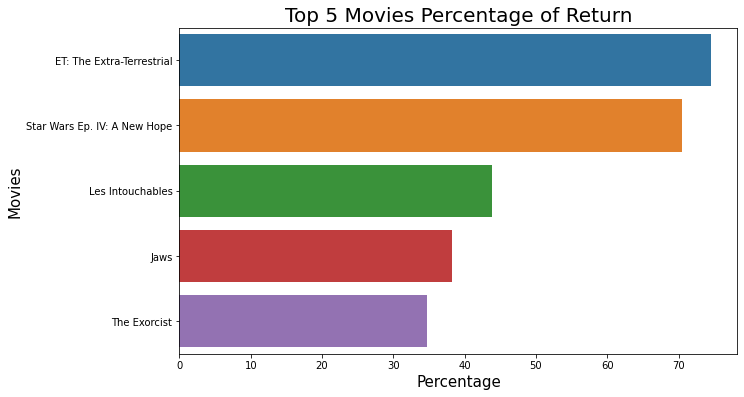

In [35]:
# set up the figure size and plot movie title vs Return Percentage

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = "roi", y = "movie", data = movie_budgets_df[:5])
ax.set_xlabel('Percentage', fontsize=15)
ax.set_ylabel('Movies', fontsize=15)
ax.set_title('Top 5 Movies Percentage of Return', fontsize=20)
ax.xaxis.offsetText.set_visible(False)

What are the most popular genres based on their returns? Now that I have the movies details I will explore another dataframe with genre details supposedly having some more information about the movies like their genre will give some advanced insights.

In [36]:
#title basics df has all the required info
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']

In [37]:
imdb_title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
movie_budgets_df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 26
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       50 non-null     object
 1   movie              50 non-null     object
 2   production_budget  50 non-null     int64 
 3   domestic_gross     50 non-null     int64 
 4   worldwide_gross    50 non-null     int64 
 5   budget_gross_diff  50 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ KB


In [39]:
# I will need to create a new column with only the release year so I could merge the two tables on that column
# for a more precise match.
movie_budgets_df_top50['release_year'] = pd.to_datetime(movie_budgets_df_top50['release_date']).dt.year

In [40]:
# Checking if the new column is added.
movie_budgets_df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 26
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       50 non-null     object
 1   movie              50 non-null     object
 2   production_budget  50 non-null     int64 
 3   domestic_gross     50 non-null     int64 
 4   worldwide_gross    50 non-null     int64 
 5   budget_gross_diff  50 non-null     int64 
 6   release_year       50 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.1+ KB


In [41]:
movie_budgets_df_top50.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015


In [42]:
# Merging the two tables on the common columns content they have.
movie_details_df2 = pd.merge(movie_budgets_df_top50, imdb_title_basics_df, left_on=  ['movie', 'release_year'],
                   right_on= ['primary_title', 'start_year'], 
                   how = 'left')

In [43]:
movie_details_df2.shape

(51, 12)

In [44]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       51 non-null     object 
 1   movie              51 non-null     object 
 2   production_budget  51 non-null     int64  
 3   domestic_gross     51 non-null     int64  
 4   worldwide_gross    51 non-null     int64  
 5   budget_gross_diff  51 non-null     int64  
 6   release_year       51 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  genres             33 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.2+ KB


In [45]:
movie_details_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,NaN,NaN,NaN,NaN,NaN
1,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997,NaN,NaN,NaN,NaN,NaN
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
3,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,NaN,NaN,NaN,NaN,NaN
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"


In [46]:
# according to the info we have 18 null values. Let's drop them since they 
# don't have the necessary data for out analysis. 
movie_details_df2.dropna(inplace=True)

In [47]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 2 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  genres             33 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.4+ KB


Although some data and information was lost, those films were being matched inaccurately and that would've led us to having incorrect conclusions anyway.

### Creating a separate column for each genre

To investigate which genres have the most returns I will first create a new column for each genre and assign a value of 1 for the genre of each movie.
Note that some movies are known for multiple genres.

In [48]:
# removing the comma sign in the list of genres bieng treated as a string data type and change to list data type.
movie_details_df2['genres'] = movie_details_df2['genres'].apply(lambda x: x.split(",") if x else x)

In [49]:
movie_details_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,primary_title,original_title,start_year,runtime_minutes,genres
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,Jurassic World,2015.0,124.0,"[Action, Adventure, Sci-Fi]"
5,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,Furious 7,Furious Seven,2015.0,137.0,"[Action, Crime, Thriller]"
6,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,The Avengers,The Avengers,2012.0,143.0,"[Action, Adventure, Sci-Fi]"
8,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,Black Panther,Black Panther,2018.0,134.0,"[Action, Adventure, Sci-Fi]"


In [50]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 2 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  genres             33 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 3.4+ KB


In [51]:
#making a set of all genres available as set doesn't allow duplicate values.

all_genres = set()
for genres in movie_details_df2['genres']:
    if genres:
        all_genres.update(genres)


In [52]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Music',
 'Musical',
 'Sci-Fi',
 'Thriller'}

In [53]:
#adding cols with zeros for all the genres. Will modify genre to 1 if the film is of that genre.

for genre in all_genres:
    movie_details_df2[genre] = np.zeros(shape=movie_details_df2.shape[0])
                                
movie_details_df2.head()
movie_details_df2.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'budget_gross_diff', 'release_year', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'Action',
       'Thriller', 'Family', 'Fantasy', 'Musical', 'Biography', 'Comedy',
       'Music', 'Drama', 'Adventure', 'Sci-Fi', 'Animation', 'Crime'],
      dtype='object')

In [54]:
#setting the genre to be 1 if the film is of that genre

for index, row in movie_details_df2.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df2.loc[index, genre] = 1

movie_details_df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,primary_title,original_title,start_year,...,Fantasy,Musical,Biography,Comedy,Music,Drama,Adventure,Sci-Fi,Animation,Crime
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,Avengers: Infinity War,Avengers: Infinity War,2018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,Jurassic World,Jurassic World,2015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,Furious 7,Furious Seven,2015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,The Avengers,The Avengers,2012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,Black Panther,Black Panther,2018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [55]:
movie_details_df_modified = movie_details_df2.drop(columns = 'genres')

In [56]:
#checking the counts for all different genres

for col in movie_details_df_modified:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df_modified[col].value_counts()}')

Viewing values in col: release_date
Top 5 values:
Mar 5, 2010     2
Mar 4, 2016     1
Jun 12, 2015    1
Jun 22, 2018    1
Jun 18, 2010    1
Jul 13, 2012    1
Jul 10, 2015    1
Apr 3, 2015     1
Mar 17, 2017    1
Jul 20, 2012    1
Dec 21, 2018    1
May 3, 2013     1
Jun 17, 2016    1
Apr 15, 2016    1
May 6, 2016     1
May 4, 2012     1
Mar 8, 2019     1
Apr 27, 2018    1
Dec 16, 2016    1
Jul 8, 2016     1
Nov 22, 2013    1
Jun 29, 2011    1
Jun 30, 2017    1
Nov 2, 2018     1
Jun 27, 2014    1
Jul 3, 2013     1
Dec 20, 2017    1
Nov 8, 2012     1
Apr 14, 2017    1
Jun 15, 2018    1
May 1, 2015     1
Feb 16, 2018    1
Name: release_date, dtype: int64
Viewing values in col: movie
Top 5 values:
Alice in Wonderland                2
The Dark Knight Rises              1
Ice Age: Continental Drift         1
Toy Story 3                        1
Bohemian Rhapsody                  1
Jurassic World                     1
Avengers: Age of Ultron            1
Incredibles 2                      1
Ju

In [57]:
#making a list of all genres

cols = list(movie_details_df_modified.columns)
cols

['release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'budget_gross_diff',
 'release_year',
 'primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'Action',
 'Thriller',
 'Family',
 'Fantasy',
 'Musical',
 'Biography',
 'Comedy',
 'Music',
 'Drama',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Crime']

In [58]:
genre_cols = cols[11:]
genre_cols

['Action',
 'Thriller',
 'Family',
 'Fantasy',
 'Musical',
 'Biography',
 'Comedy',
 'Music',
 'Drama',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Crime']

In [59]:
#getting a dict with genre counts

genre_count = {}
for col in genre_cols:
    count = np.sum(movie_details_df2[col] == 1)
    genre_count[col] = count

In [60]:
genre_count

{'Action': 19,
 'Thriller': 4,
 'Family': 3,
 'Fantasy': 4,
 'Musical': 2,
 'Biography': 1,
 'Comedy': 10,
 'Music': 1,
 'Drama': 2,
 'Adventure': 27,
 'Sci-Fi': 12,
 'Animation': 10,
 'Crime': 2}

## Visualizing Genre Frequency.

In [61]:
# assign the list of keys and values to visualize what our top 3 recurring genres.
keys = list(genre_count.keys())
values = list(genre_count.values())


sorted_top3_values = sorted(values, key = lambda x: x, reverse = True)[:3]
print(sorted_top3_values)


[27, 19, 12]


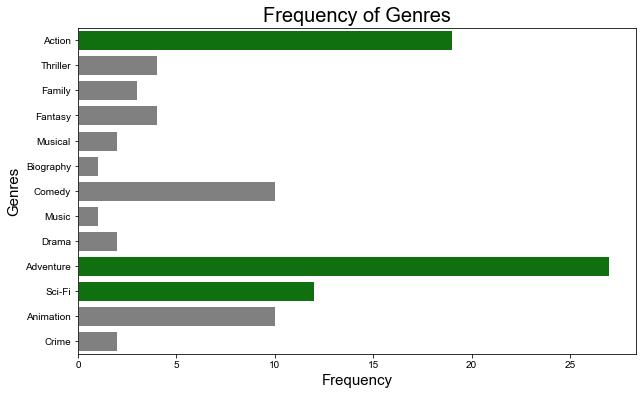

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='whitegrid')
clrs = ['green' if (x in sorted_top3_values) else 'grey' for x in values ]
sns.barplot(y = keys, x = values, palette=clrs)
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Genres', fontsize=15)
ax.set_title('Frequency of Genres', fontsize=20);   

Notice from the plot that the top 3 recurring genres are 'Action', 'Adventure', and 'SciFi'.
I will explore this more to learn if this applies true for the revenue returns as well.

In [63]:
# create a dict for the genres and mean of their worldwide gross. 
worldwide_gross = {}
for genre in all_genres:
    grouped = movie_details_df_modified.groupby(by = "".join(genre)).mean()
    worldwide_gross[genre] = grouped.iloc[1]["worldwide_gross"]
    
    print(worldwide_gross[genre])

1280519596.9473684
1237133785.25
1082515121.0
1114269141.5
1142345408.0
894985342.0
1028328686.3
894985342.0
928919944.5
1177740759.5925925
1335618804.75
1056131138.1
1376784530.5


In [64]:
worldwide_gross = dict(sorted(worldwide_gross.items(), key = lambda item : item[1], reverse = True))
worldwide_gross

{'Crime': 1376784530.5,
 'Sci-Fi': 1335618804.75,
 'Action': 1280519596.9473684,
 'Thriller': 1237133785.25,
 'Adventure': 1177740759.5925925,
 'Musical': 1142345408.0,
 'Fantasy': 1114269141.5,
 'Family': 1082515121.0,
 'Animation': 1056131138.1,
 'Comedy': 1028328686.3,
 'Drama': 928919944.5,
 'Biography': 894985342.0,
 'Music': 894985342.0}

## Visualizing Genre vs Worldwide Gross.

[1376784530.5, 1335618804.75, 1280519596.9473684]


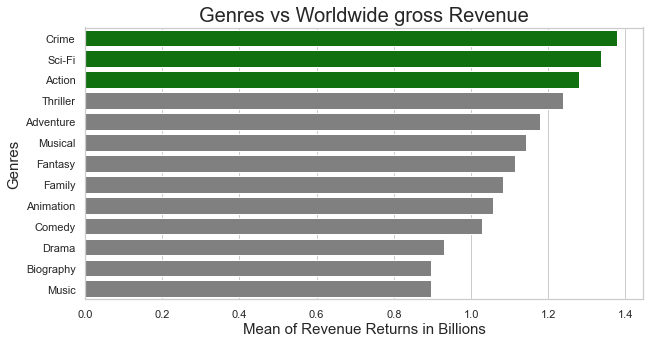

In [65]:
# Visualize the figures.
keys   = list(worldwide_gross.keys())
values = list(worldwide_gross.values())

sorted_top3_values = sorted(values, key = lambda x: x, reverse = True)[:3]
print(sorted_top3_values)
sns.set_theme(style='whitegrid')
fig, ax       = plt.subplots(figsize=(10,5))
clrs          = ['green' if (x in sorted_top3_values) else 'grey' for x in values ]
sns.barplot(y = keys, x = values, palette=clrs)
ax.set_xlabel('Mean of Revenue Returns in Billions', fontsize=15)
ax.set_ylabel('Genres', fontsize=15)
ax.set_title('Genres vs Worldwide gross Revenue', fontsize=20)
ax.xaxis.offsetText.set_visible(False)

In [66]:
# movie_details_df2
budget_gross_diff = {}
for genre in all_genres:
    grouped = movie_details_df2.groupby(by = "".join(genre)).median()
    budget_gross_diff[genre] = grouped.iloc[1]["budget_gross_diff"]
    
    
budget_gross_diff


{'Action': 986894640.0,
 'Thriller': 947686624.0,
 'Family': 825491110.0,
 'Fantasy': 906192875.0,
 'Musical': 962345408.0,
 'Biography': 839985342.0,
 'Comedy': 871962904.5,
 'Music': 839985342.0,
 'Drama': 813919944.5,
 'Adventure': 928790543.0,
 'Sci-Fi': 1043903117.5,
 'Animation': 884323225.5,
 'Crime': 1156784530.5}

In [67]:
budget_gross_diff = dict(sorted(budget_gross_diff.items(), key = lambda item : item[1], reverse = True))
budget_gross_diff

{'Crime': 1156784530.5,
 'Sci-Fi': 1043903117.5,
 'Action': 986894640.0,
 'Musical': 962345408.0,
 'Thriller': 947686624.0,
 'Adventure': 928790543.0,
 'Fantasy': 906192875.0,
 'Animation': 884323225.5,
 'Comedy': 871962904.5,
 'Biography': 839985342.0,
 'Music': 839985342.0,
 'Family': 825491110.0,
 'Drama': 813919944.5}

## Visualizing Genre vs Gross Profit.

[1156784530.5, 1043903117.5, 986894640.0]


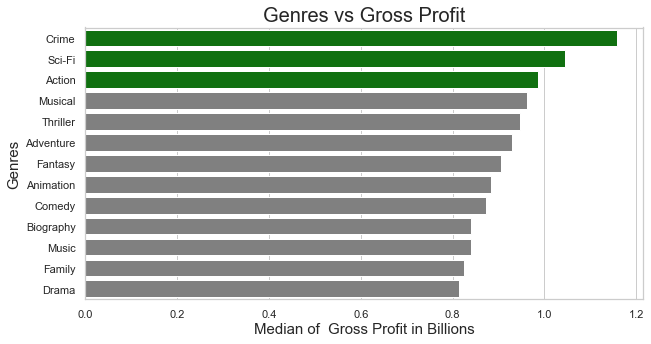

In [68]:
key = list(budget_gross_diff.keys())
value = list(budget_gross_diff.values())

sorted_top3_values = sorted(value, key = lambda x: x, reverse = True)[:3]
print(sorted_top3_values)

sns.set_theme(style='whitegrid')
clrs = ['green' if (x in sorted_top3_values) else 'grey' for x in value]
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y = key, x = value, palette=clrs)
ax.set_xlabel('Median of  Gross Profit in Billions', fontsize=15)
ax.set_ylabel('Genres', fontsize=15)
ax.set_title('Genres vs Gross Profit', fontsize=20)
ax.xaxis.offsetText.set_visible(False)

Great! Once again 'Crime', 'SciFi', and 'Action' make it to the top3 revenue generating genres. From this I am able to conclude that the mean and median resulting in similar outcomes signifies the uniform distribution of the data. Hence, coming to the conclusion of the first question ***'Which genres generate the highest revenue per movie?'***. According to the findings so far I would recommend Microsoft to focus more on 'Crime', 'SciFi' and 'Action' movies for competetive revenue returns.

 ## Question 2  Who are the most frequent directors in the top 3 grossing genres?

Looking into the table with list of titles the professionals are known for and try to extract the directors and writers involved in those movies. Next I will try and merge the title ids of the directors and writers to see who are the too grossing directors first I will try to find the tconst of the genres with top grossing revenue

In [69]:
imdb_title_crew_df = csv_files_dict['imdb_title_crew_gz']
imdb_title_crew_df.head() 

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [70]:
imdb_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


## Data Cleaning.

Now in the title_crew data frame there are a couple of things to fix. The first would be to drop the null values since they are small in number and also carrying on with those null values would not help in finding the answers I am looking for. Second point would be to adjust and reset the index column to a numeric value.

In [71]:
imdb_title_crew_df.dropna(inplace=True)

In [72]:
imdb_title_crew_df = imdb_title_crew_df.reset_index()

In [73]:
imdb_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109008 entries, 0 to 109007
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     109008 non-null  object
 1   directors  109008 non-null  object
 2   writers    109008 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


In [74]:
imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0462036,nm1940585,nm1940585
2,tt0835418,nm0151540,"nm0310087,nm0841532"
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
4,tt0996958,nm2286991,"nm2286991,nm2651190"


Ok, now it looks good and data has been cleaned for further analysis. The next step would be to load in the 'imdb_title_basics_gz' to take a look at the connection of title ids to their genres.

In [75]:
# assign a variable to the dataframe. 
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']
imdb_title_basics_df.head() 

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [76]:
imdb_title_basics_df.shape

(146144, 5)

In [77]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [78]:
imdb_title_basics_df.isna().any()

primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

Clearly there are some null values in this data frame. I'll start by droping the null values, which are very few as compared to the data, as well as removing the 'runtime_minutes' column since I don't need it for my analysis.

In [79]:
imdb_title_basics_df.dropna(inplace=True)

In [80]:
imdb_title_basics_df = imdb_title_basics_df.drop(['runtime_minutes'], axis=1)

In [81]:
# also reset the index column to be numeric instead of tconst.
imdb_title_basics_df = imdb_title_basics_df.reset_index()

In [82]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112232 entries, 0 to 112231
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          112232 non-null  object
 1   primary_title   112232 non-null  object
 2   original_title  112232 non-null  object
 3   start_year      112232 non-null  int64 
 4   genres          112232 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


## Merging tables to obtain title ids of genres.

Now that the data frame is cleaned I will start by merging the 'imdb_title_crew_df' data frame and the 'imdb_title_basics_df' based on the common tconst column. I am using a left join on 'imdb_title_crew_df' because I need all the directors and writers to be my base point for matching with the rest of the columns on the 'imdb_title_basics_df'.

From there I will start cleaing the data and find the directors and writers known for the top grossing genres.

In [83]:
# merging the title crew (directors and writers) dataframe with the title basics.
director_writer_df = pd.merge(imdb_title_crew_df, imdb_title_basics_df, left_on=  ['tconst'], right_on = ['tconst'],
                   how = 'left')
director_writer_df.head()

,tconst,directors,writers,primary_title,original_title,start_year,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,2012.0,Comedy
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012.0,Drama
2,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,2012.0,Comedy
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,2010.0,Thriller
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,2013.0,"Action,Adventure,Fantasy"


In [84]:
director_writer_df.shape

(109008, 7)

In [85]:
# removing the 'start year' column since it is not necessary for our analysis.
director_writer_df = director_writer_df.drop(['start_year'], axis=1)
director_writer_df.head()

,tconst,directors,writers,primary_title,original_title,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,Comedy
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,Drama
2,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,Comedy
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,Thriller
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"Action,Adventure,Fantasy"


In [86]:
director_writer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109008 entries, 0 to 109007
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          109008 non-null  object
 1   directors       109008 non-null  object
 2   writers         109008 non-null  object
 3   primary_title   87417 non-null   object
 4   original_title  87417 non-null   object
 5   genres          87417 non-null   object
dtypes: object(6)
memory usage: 5.8+ MB


In [87]:
# Removing the null values from our data since they don't correlate with the directors or writers.
director_writer_df.dropna(inplace=True)

In [88]:
director_writer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87417 entries, 0 to 109006
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          87417 non-null  object
 1   directors       87417 non-null  object
 2   writers         87417 non-null  object
 3   primary_title   87417 non-null  object
 4   original_title  87417 non-null  object
 5   genres          87417 non-null  object
dtypes: object(6)
memory usage: 4.7+ MB


In [89]:
director_writer_df.head()

,tconst,directors,writers,primary_title,original_title,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,Comedy
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,Drama
2,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,Comedy
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,Thriller
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"Action,Adventure,Fantasy"


## Create column for only top3 genres.

Now that I have the data cleaned, noticing that the 'genres' column has list values as well I will be creating a new series 'top3_gross_genres' to extract only the genres metioned in top3_grossing_genres. For this code I will use numpy's np.zeros to return a new column with zero values which will be later replaced.

In [90]:
director_writer_df['top3_gross_genres'] = np.zeros(shape=director_writer_df.shape[0])
director_writer_df   

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,Comedy,0.0
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,Drama,0.0
2,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,Comedy,0.0
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,Thriller,0.0
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"Action,Adventure,Fantasy",0.0
...,...,...,...,...,...,...,...
109002,tt8992954,nm4927970,nm4927970,Rossotrevi - The red fountain,Rossotrevi - The red fountain,"Biography,Documentary",0.0
109003,tt8998302,nm10121510,nm10121510,Vietnam@55,Vietnam@55,Documentary,0.0
109004,tt8999892,nm10122247,"nm10122247,nm10122246",Dumpster Fire: A Time Of Current Times,Dumpster Fire: A Time Of Current Times,Comedy,0.0
109005,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,Documentary,0.0


In [91]:
# Return list of genres from the string in the 'genres' column 
director_writer_df['genres'] = director_writer_df['genres'].apply(lambda x: x.split(",") if x else x)
director_writer_df

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,[Comedy],0.0
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,[Drama],0.0
2,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,[Comedy],0.0
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,[Thriller],0.0
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",0.0
...,...,...,...,...,...,...,...
109002,tt8992954,nm4927970,nm4927970,Rossotrevi - The red fountain,Rossotrevi - The red fountain,"[Biography, Documentary]",0.0
109003,tt8998302,nm10121510,nm10121510,Vietnam@55,Vietnam@55,[Documentary],0.0
109004,tt8999892,nm10122247,"nm10122247,nm10122246",Dumpster Fire: A Time Of Current Times,Dumpster Fire: A Time Of Current Times,[Comedy],0.0
109005,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,[Documentary],0.0


In [92]:
# These are the top3 grossing genres
# Unpack the lists in the 'genres' column and store only the members of 
# the top3 genres in the new column.

top3_genres = ['Crime', 'Action', 'Sci-Fi']

top_list = []
total_top_list = []

for index, row in director_writer_df.iterrows():
    if row['genres']:
        for genre_list in row['genres']:
            if genre_list in top3_genres:
                top_list.append(genre_list)
            else:
                continue                 
        total_top_list.append(top_list)
        top_list = []

director_writer_df = director_writer_df.assign(top3_gross_genres = total_top_list)


In [93]:
director_writer_df.head()

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,[Comedy],[]
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,[Drama],[]
2,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,[Comedy],[]
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,[Thriller],[]
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action]


In [94]:
director_writer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87417 entries, 0 to 109006
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tconst             87417 non-null  object
 1   directors          87417 non-null  object
 2   writers            87417 non-null  object
 3   primary_title      87417 non-null  object
 4   original_title     87417 non-null  object
 5   genres             87417 non-null  object
 6   top3_gross_genres  87417 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


Perfect! Since the empty values were returned as an emplty list I will filter them out using the next code.

In [95]:
# Removes rows with empty top3_gross_genres.
director_writer_df = director_writer_df[director_writer_df['top3_gross_genres'].map(lambda d: len(d)>0)]

In [96]:
director_writer_df.head()

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action]
5,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,Straw Dogs,"[Action, Drama, Thriller]",[Action]
9,tt10011102,nm4853354,"nm2215938,nm0219964",The Sholay Girl,The Sholay Girl,"[Action, Biography, Drama]",[Action]
36,tt1138442,nm1012219,"nm0000247,nm4221403,nm4220872,nm4220087,nm1109...",A Better Tomorrow,Moo-jeok-ja,"[Action, Drama]",[Action]
40,tt1323592,"nm2598931,nm2442244","nm2598931,nm0132843,nm3032994,nm3197208",Cornered,Cornered,"[Action, Crime, Mystery]","[Action, Crime]"


In [97]:
director_writer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13157 entries, 4 to 108982
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tconst             13157 non-null  object
 1   directors          13157 non-null  object
 2   writers            13157 non-null  object
 3   primary_title      13157 non-null  object
 4   original_title     13157 non-null  object
 5   genres             13157 non-null  object
 6   top3_gross_genres  13157 non-null  object
dtypes: object(7)
memory usage: 822.3+ KB


## Exploring more dataframes for name ids

 
Alright, I will keep this dataframe on hold while I explore another table with the name-ids of the directors and writers involved in those genres.

In [98]:
# Convert csv file to dataframe
imdb_title_principals = csv_files_dict["imdb_title_principals_gz"]
imdb_title_principals.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [99]:
imdb_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


Lets do some data cleaning by reseting the index to be numeric as well as dealing with the null values.

In [100]:
imdb_title_principals = imdb_title_principals.reset_index()

In [101]:
imdb_title_principals = imdb_title_principals.drop(columns =['job', 'characters'], axis=1)

In [102]:
imdb_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   ordering  1028186 non-null  int64 
 2   nconst    1028186 non-null  object
 3   category  1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


The next step would be to first join the 'imdb_title_principals' and the 'director_writer_df' to find the name-ids of the directors & writers.

In [103]:
# Creating a new dataframe with a left join on 'tconst'
director_writer_df_modified = pd.merge(director_writer_df, imdb_title_principals, left_on=  ['tconst'],
                   right_on= ['tconst'], 
                   how = 'left')
director_writer_df_modified.head()

,tconst,directors,writers,primary_title,original_title,genres,top3_gross_genres,ordering,nconst,category
0,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],10.0,nm2370474,cinematographer
1,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],1.0,nm2286991,actress
2,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],2.0,nm2576320,actor
3,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],3.0,nm2623919,actor
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],4.0,nm1918942,actress


In [104]:
director_writer_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 115017
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             115018 non-null  object 
 1   directors          115018 non-null  object 
 2   writers            115018 non-null  object 
 3   primary_title      115018 non-null  object 
 4   original_title     115018 non-null  object 
 5   genres             115018 non-null  object 
 6   top3_gross_genres  115018 non-null  object 
 7   ordering           115017 non-null  float64
 8   nconst             115017 non-null  object 
 9   category           115017 non-null  object 
dtypes: float64(1), object(9)
memory usage: 9.7+ MB


I am more interested in the nconst and it only has one row of missing value so I am happily removing that. Also I am going to remove all the other columns that are not necessary for the analysis.

In [105]:
director_writer_df_modified = director_writer_df_modified.drop(columns = ['ordering', 'original_title'])
director_writer_df_modified.head()

,tconst,directors,writers,primary_title,genres,top3_gross_genres,nconst,category
0,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],nm2370474,cinematographer
1,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],nm2286991,actress
2,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],nm2576320,actor
3,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],nm2623919,actor
4,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],nm1918942,actress


In [106]:
director_writer_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 115017
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tconst             115018 non-null  object
 1   directors          115018 non-null  object
 2   writers            115018 non-null  object
 3   primary_title      115018 non-null  object
 4   genres             115018 non-null  object
 5   top3_gross_genres  115018 non-null  object
 6   nconst             115017 non-null  object
 7   category           115017 non-null  object
dtypes: object(8)
memory usage: 7.9+ MB


As we can see from the dataframe some directors/ writers also have other roles or professions. I will extract only the roles I am looking for into the data frame and ignore the other professions one may have.

In [107]:
director_writer_df_modified.dropna(inplace=True)

In [108]:
director_writer_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115017 entries, 0 to 115017
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   tconst             115017 non-null  object
 1   directors          115017 non-null  object
 2   writers            115017 non-null  object
 3   primary_title      115017 non-null  object
 4   genres             115017 non-null  object
 5   top3_gross_genres  115017 non-null  object
 6   nconst             115017 non-null  object
 7   category           115017 non-null  object
dtypes: object(8)
memory usage: 7.9+ MB


In [109]:
# Include data of only a 'writer' or 'directory' in the catgory section
options = ['director', 'writer']
director_writer_df_modified = director_writer_df_modified.loc[director_writer_df_modified['category'].isin(options)] 

In [110]:
director_writer_df_modified.head()

,tconst,directors,writers,primary_title,genres,top3_gross_genres,nconst,category
5,tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],nm2651190,writer
15,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0527109,director
16,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0329051,writer
17,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0001603,writer
18,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],nm0930684,writer


In [111]:
director_writer_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24813 entries, 5 to 115013
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tconst             24813 non-null  object
 1   directors          24813 non-null  object
 2   writers            24813 non-null  object
 3   primary_title      24813 non-null  object
 4   genres             24813 non-null  object
 5   top3_gross_genres  24813 non-null  object
 6   nconst             24813 non-null  object
 7   category           24813 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


## Matching name ids to names and title ids.

 Now that we have all the name-ids of the directors and writers it is time to put a name on them. So lets investigate another file with the name of those ids.

In [112]:
# assign a variable to the dataframe. 
imdb_name_basics = csv_files_dict['imdb_name_basics_gz']
imdb_name_basics

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


In [113]:
imdb_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [114]:
# drop all the columns that are not essential to the analysis.
imdb_name_basics = imdb_name_basics.drop(columns = ['birth_year','death_year', 'known_for_titles'])

In [115]:
imdb_name_basics

,primary_name,primary_profession
nconst,,
nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
nm0061865,Joseph Bauer,"composer,music_department,sound_department"
nm0062070,Bruce Baum,"miscellaneous,actor,writer"
nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...
nm9990381,Susan Grobes,actress
nm9990690,Joo Yeon So,actress
nm9991320,Madeline Smith,actress


In [116]:
# Merge the two tables to find the names based on the common 'nconst'
imdb_name_basics_modified = pd.merge(imdb_name_basics, director_writer_df_modified, left_on=  ['nconst'],
                   right_on= ['nconst'], 
                   how = 'right')

In [117]:
imdb_name_basics_modified.head()

,nconst,primary_name,primary_profession,tconst,directors,writers,primary_title,genres,top3_gross_genres,category
0,nm2651190,Kim Pritekel,"writer,director,actress",tt0996958,nm2286991,"nm2286991,nm2651190",Legend of the Red Reaper,"[Action, Adventure, Fantasy]",[Action],writer
1,nm2651190,Kim Pritekel,"writer,director,actress",tt1656191,nm2651190,"nm3914468,nm2651190",Self Portrait,"[Crime, Drama, Thriller]",[Crime],director
2,nm0527109,Rod Lurie,"writer,director,producer",tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],director
3,nm0329051,David Zelag Goodman,writer,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],writer
4,nm0001603,Sam Peckinpah,"writer,director,producer",tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,"[Action, Drama, Thriller]",[Action],writer


## Data Cleaning

In [118]:
imdb_name_basics_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24813 entries, 0 to 24812
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nconst              24813 non-null  object
 1   primary_name        24813 non-null  object
 2   primary_profession  24750 non-null  object
 3   tconst              24813 non-null  object
 4   directors           24813 non-null  object
 5   writers             24813 non-null  object
 6   primary_title       24813 non-null  object
 7   genres              24813 non-null  object
 8   top3_gross_genres   24813 non-null  object
 9   category            24813 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


What does this data tell me? 
I see a number of duplicate 'nconst' in the table. A groupby method should give a better insight into the purpose of the duplicates.

In [119]:
# Using groupby method to investigate some more.
grouped = imdb_name_basics_modified.groupby(by = 'primary_name').count()

In [120]:
grouped

,nconst,primary_profession,tconst,directors,writers,primary_title,genres,top3_gross_genres,category
primary_name,,,,,,,,,
42nd Street Pete,1,1,1,1,1,1,1,1,1
A Type Machine,1,1,1,1,1,1,1,1,1
A'Ali de Sousa,1,1,1,1,1,1,1,1,1
A. Deepakraj,5,5,5,5,5,5,5,5,5
A. Lee Lee,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ödön von Horvath,1,1,1,1,1,1,1,1,1
Ögünç Ersöz,1,1,1,1,1,1,1,1,1
Özgür Yildirim,2,2,2,2,2,2,2,2,2


Notice that some of the professionals in the 'primary_name' are known for their roles in more than one title of movie which explains why there were duplicates. But just to be sure I will look into one of the writers.

In [121]:
imdb_name_basics_modified.loc[imdb_name_basics_modified['primary_name'] == 'A. Deepakraj']

,nconst,primary_name,primary_profession,tconst,directors,writers,primary_title,genres,top3_gross_genres,category
1126,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt6734984,nm2356507,"nm1189085,nm5635672,nm2356507",Duvvada Jagannadham,"[Action, Comedy]",[Action],writer
1127,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt6522398,nm3008574,"nm1189085,nm0707287,nm4844765,nm5635145,nm2350...",Katamarayudu,"[Action, Comedy]",[Action],writer
1128,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt3142764,nm2050878,"nm1189085,nm4547509,nm5635145,nm6580663,nm2056...",Race Gurram,"[Action, Comedy]",[Action],writer
1129,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt6468814,nm6580663,"nm9581377,nm1189085,nm6580663,nm2056772",Touch Chesi Chudu,[Action],[Action],writer
1130,nm1189085,A. Deepakraj,"writer,assistant_director,miscellaneous",tt2398340,nm3008574,"nm1189085,nm1416190,nm3008574,nm5635145",Tadakha,[Action],[Action],writer


Alright, that looks good so far. I will go ahead and merge another table 'movie_budgets_top50' with 'imdb_title_basics_df', which we had already worked on, to link the names to the genres.

In [122]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,Comedy


In [123]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112232 entries, 0 to 112231
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          112232 non-null  object
 1   primary_title   112232 non-null  object
 2   original_title  112232 non-null  object
 3   start_year      112232 non-null  int64 
 4   genres          112232 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


In [124]:
movie_budgets_df_top50.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015


In [125]:
movie_budgets_df_top50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 26
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       50 non-null     object
 1   movie              50 non-null     object
 2   production_budget  50 non-null     int64 
 3   domestic_gross     50 non-null     int64 
 4   worldwide_gross    50 non-null     int64 
 5   budget_gross_diff  50 non-null     int64 
 6   release_year       50 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.1+ KB


In [126]:
# Merge the two tables to find out the names involved with the top 50 highest returns
movie_details_df3 = pd.merge(movie_budgets_df_top50, imdb_title_basics_df, left_on =  ['movie', 'release_year'],
                   right_on= ['primary_title', 'start_year'], 
                   how = 'inner')
movie_details_df3.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,tconst,primary_title,original_title,start_year,genres
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi"
1,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,tt0369610,Jurassic World,Jurassic World,2015,"Action,Adventure,Sci-Fi"
2,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,tt2820852,Furious 7,Furious Seven,2015,"Action,Crime,Thriller"
3,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,tt0848228,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi"
4,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,tt1825683,Black Panther,Black Panther,2018,"Action,Adventure,Sci-Fi"


In [127]:
movie_details_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       33 non-null     object
 1   movie              33 non-null     object
 2   production_budget  33 non-null     int64 
 3   domestic_gross     33 non-null     int64 
 4   worldwide_gross    33 non-null     int64 
 5   budget_gross_diff  33 non-null     int64 
 6   release_year       33 non-null     int64 
 7   tconst             33 non-null     object
 8   primary_title      33 non-null     object
 9   original_title     33 non-null     object
 10  start_year         33 non-null     int64 
 11  genres             33 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.4+ KB


In [128]:
# Drop columns not essential for our analysis.
movie_details_df3 = movie_details_df3.drop(columns=
                                           ['primary_title', 'start_year',
                                            'release_year', 'original_title'],
                                           axis=1)

In [129]:
movie_details_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       33 non-null     object
 1   movie              33 non-null     object
 2   production_budget  33 non-null     int64 
 3   domestic_gross     33 non-null     int64 
 4   worldwide_gross    33 non-null     int64 
 5   budget_gross_diff  33 non-null     int64 
 6   tconst             33 non-null     object
 7   genres             33 non-null     object
dtypes: int64(4), object(4)
memory usage: 2.3+ KB


Next join the table of names and the budget table to finally make a graph of the revenues those genres return.

In [130]:
dir_writer_modified = pd.merge(movie_details_df3, imdb_name_basics_modified, left_on=  ['tconst'],
                   right_on= ['tconst'], 
                   how = 'left')
dir_writer_modified.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,genres_x,nconst,primary_name,primary_profession,directors,writers,primary_title,genres_y,top3_gross_genres,category
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0498278,Stan Lee,"producer,writer,actor","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Sci-Fi]",writer
1,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0456158,Jack Kirby,"writer,animation_department,miscellaneous","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Sci-Fi]",writer
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,"producer,director,writer","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Sci-Fi]",director
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo,"producer,director,writer","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Sci-Fi]",director
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321655,Christopher Markus,"writer,producer,actor","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War,"[Action, Adventure, Sci-Fi]","[Action, Sci-Fi]",writer


In [131]:
dir_writer_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        95 non-null     object
 1   movie               95 non-null     object
 2   production_budget   95 non-null     int64 
 3   domestic_gross      95 non-null     int64 
 4   worldwide_gross     95 non-null     int64 
 5   budget_gross_diff   95 non-null     int64 
 6   tconst              95 non-null     object
 7   genres_x            95 non-null     object
 8   nconst              81 non-null     object
 9   primary_name        81 non-null     object
 10  primary_profession  81 non-null     object
 11  directors           81 non-null     object
 12  writers             81 non-null     object
 13  primary_title       81 non-null     object
 14  genres_y            81 non-null     object
 15  top3_gross_genres   81 non-null     object
 16  category            81 non-n

Before going into further analysis I will have to deal with the columns not valuable to my analysis as well as the null values which would be of no use since they don't contain the necessary data I am looking for.

In [132]:
dir_writer_modified = dir_writer_modified.drop(
                                        columns=['top3_gross_genres','genres_y',
                                        'writers', 'directors'])

In [133]:
dir_writer_modified.dropna(inplace=True)

In [134]:
dir_writer_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 92
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        81 non-null     object
 1   movie               81 non-null     object
 2   production_budget   81 non-null     int64 
 3   domestic_gross      81 non-null     int64 
 4   worldwide_gross     81 non-null     int64 
 5   budget_gross_diff   81 non-null     int64 
 6   tconst              81 non-null     object
 7   genres_x            81 non-null     object
 8   nconst              81 non-null     object
 9   primary_name        81 non-null     object
 10  primary_profession  81 non-null     object
 11  primary_title       81 non-null     object
 12  category            81 non-null     object
dtypes: int64(4), object(9)
memory usage: 8.9+ KB


In [135]:
dir_writer_modified.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,genres_x,nconst,primary_name,primary_profession,primary_title,category
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0498278,Stan Lee,"producer,writer,actor",Avengers: Infinity War,writer
1,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0456158,Jack Kirby,"writer,animation_department,miscellaneous",Avengers: Infinity War,writer
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,"producer,director,writer",Avengers: Infinity War,director
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo,"producer,director,writer",Avengers: Infinity War,director
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321655,Christopher Markus,"writer,producer,actor",Avengers: Infinity War,writer


In [136]:
dir_writer_modified.shape

(81, 13)

## Select top 10 Directors/ Writers 

By arranging the dataframe in descending order I will find the top 10 reccuring directors and writers generating the highest revenue returns. 

In [137]:
# arrange in descending order by budget_gross_diff.
dir_writer_modified = dir_writer_modified.sort_values(by='budget_gross_diff', ascending=False)
dir_writer_modified.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,tconst,genres_x,nconst,primary_name,primary_profession,primary_title,category
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0498278,Stan Lee,"producer,writer,actor",Avengers: Infinity War,writer
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321655,Christopher Markus,"writer,producer,actor",Avengers: Infinity War,writer
5,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm1321656,Stephen McFeely,"writer,producer,actor",Avengers: Infinity War,writer
1,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0456158,Jack Kirby,"writer,animation_department,miscellaneous",Avengers: Infinity War,writer
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,"Action,Adventure,Sci-Fi",nm0751648,Joe Russo,"producer,director,writer",Avengers: Infinity War,director


In [138]:
# Select top 10 values.
dir_writer_top10 = dir_writer_modified[:10]
dir_writer_top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        10 non-null     object
 1   movie               10 non-null     object
 2   production_budget   10 non-null     int64 
 3   domestic_gross      10 non-null     int64 
 4   worldwide_gross     10 non-null     int64 
 5   budget_gross_diff   10 non-null     int64 
 6   tconst              10 non-null     object
 7   genres_x            10 non-null     object
 8   nconst              10 non-null     object
 9   primary_name        10 non-null     object
 10  primary_profession  10 non-null     object
 11  primary_title       10 non-null     object
 12  category            10 non-null     object
dtypes: int64(4), object(9)
memory usage: 1.1+ KB


In [139]:
# storing all the names from the top 10 movies with no duplicates.
all_names = []
for names in dir_writer_top10['primary_name']:
    all_names.append(names)
# 
all_names = set(all_names)
all_names

{'Amanda Silver',
 'Anthony Russo',
 'Christopher Markus',
 'Colin Trevorrow',
 'Derek Connolly',
 'Jack Kirby',
 'Joe Russo',
 'Rick Jaffa',
 'Stan Lee',
 'Stephen McFeely'}

In [140]:
# group by primary name of budget_gross_diff median value. 
grouped = dir_writer_modified.groupby(by = "primary_name").median()
grouped.info

<bound method DataFrame.info of                                  production_budget  domestic_gross  \
primary_name                                                         
Amanda Silver                          215000000.0     652270625.0   
Anna Boden                             175000000.0     426525952.0   
Anthony Russo                          275000000.0     543449915.5   
Bob Kane                               275000000.0     448139099.0   
Brad Bird                              200000000.0     608581744.0   
Chris McKenna                           90000000.0     404508916.0   
Chris Morgan                           220000000.0     289385892.5   
Chris Van Allsburg                      90000000.0     404508916.0   
Chris Weitz                            200000000.0     532177324.0   
Christopher Markus                     275000000.0     543449915.5   
Christopher Nolan                      275000000.0     448139099.0   
Colin Trevorrow                        192500000.0     534

In [141]:
#Store key and values of the grouped data as a dictionary. 
names_dir_writer = {}

for name in all_names:   
    names_dir_writer[name] = grouped.loc[name]['budget_gross_diff']
names_dir_writer


{'Derek Connolly': 1284813831.5,
 'Anthony Russo': 1319101806.5,
 'Colin Trevorrow': 1284813831.5,
 'Stephen McFeely': 1319101806.5,
 'Amanda Silver': 1433854864.0,
 'Stan Lee': 1110336093.5,
 'Christopher Markus': 1319101806.5,
 'Joe Russo': 1319101806.5,
 'Jack Kirby': 1072413963.0,
 'Rick Jaffa': 1433854864.0}

In [142]:
# arrange in descending order and get it ready for visualisation.
names_dir_writer = dict(sorted(names_dir_writer.items(), key = lambda item : item[1], reverse = True))
names_dir_writer

{'Amanda Silver': 1433854864.0,
 'Rick Jaffa': 1433854864.0,
 'Anthony Russo': 1319101806.5,
 'Stephen McFeely': 1319101806.5,
 'Christopher Markus': 1319101806.5,
 'Joe Russo': 1319101806.5,
 'Derek Connolly': 1284813831.5,
 'Colin Trevorrow': 1284813831.5,
 'Stan Lee': 1110336093.5,
 'Jack Kirby': 1072413963.0}

## Visualize names vs Gross Profit.

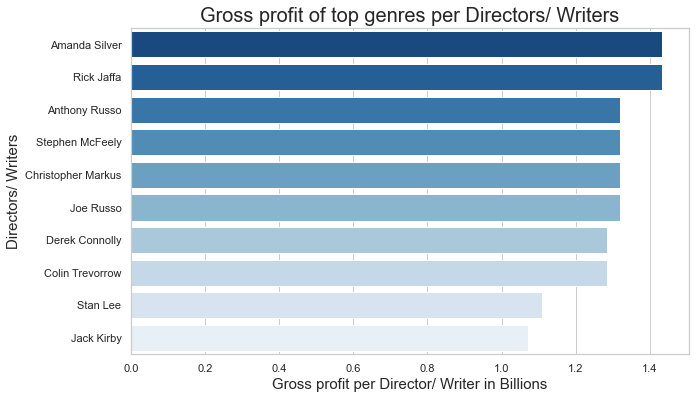

In [143]:
keys = list(names_dir_writer.keys())
values = list(names_dir_writer.values())

sorted_top3_values = sorted(values, key = lambda x: x, reverse = True)[:3]


fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(y = keys, x = values, data = dir_writer_top10, palette='Blues_r')

ax.set_xlabel('Gross profit per Director/ Writer in Billions', fontsize=15)
ax.set_ylabel('Directors/ Writers', fontsize=15)
ax.set_title('Gross profit of top genres per Directors/ Writers', fontsize=20)
ax.xaxis.offsetText.set_visible(False)


This brings us to the conclusion for our second question of 'Who are the most frequent directors in the top 3 grossing genres?'
From our findings above I would recommend these directors and writers if Microsoft is to perform well in the movie industry.

* Rick Jaffa 
* Amanda Silver 
* Stephen McFeely 
* Christopher Markus
* Anthony Russo 
* Joe Russo
* Derek Connolly 
* Colin Trevorrow 
* Stan Lee 
* Jack Kirby

## Question 3. What is the recommended budget investment for Movie production?

Coming to our final question I will try to incorporate all the information and findings gathered above to identify how much is  the effective level of investment recommended for Microsoft to enter the movie industry with a bang. Although I would assume the more the production-budget the better the return, I will look into the figures we have and back it up with some facts. First lets explore the budget and return values to get some insight on whether they are correlated. 
 * Does more production budget necessarily mean greater returns?

##  Analysing Correlation between Budget and Revenue.

Let's plot a 'production budget' vs 'worldwide gross' to comprehend how strongly they are related.

Text(0, 0.5, 'Worldwide Gross')

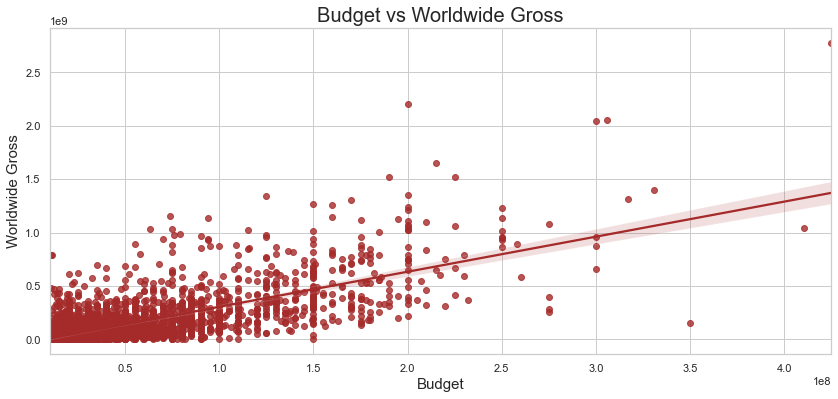

In [144]:
fig, ax = plt.subplots(figsize=(14,6))
sns.regplot(x='production_budget', y='worldwide_gross', ax=ax, data=movie_budgets_df, color='Brown')
ax.set_title('Budget vs Worldwide Gross', fontsize=20)
ax.set_xlabel('Budget', fontsize=15)
ax.set_ylabel('Worldwide Gross', fontsize=15)

In [145]:
# Find the correlation between the budget and the gross profit earned.
production_budget = list(movie_budgets_df['production_budget'])
budget_gross_diff = list(movie_budgets_df['budget_gross_diff'])

corr = np.corrcoef(production_budget,budget_gross_diff)[0][1]
corr = np.round(corr, 2)


In [146]:
corr

0.58

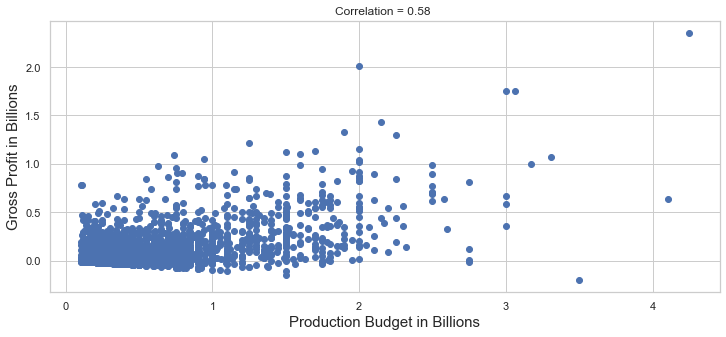

In [147]:
x = list(movie_budgets_df['production_budget'])
y = list(movie_budgets_df['budget_gross_diff'])



fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(x,y)
ax.set_title('Correlation = {} '.format(corr))
ax.set_xlabel('Production Budget in Billions', fontsize=15)
ax.set_ylabel('Gross Profit in Billions', fontsize=15)
ax.xaxis.offsetText.set_visible(False)
ax.yaxis.offsetText.set_visible(False);

A Correlation coefficient value of 0.58 signifies a low positive correlation. Therefore, although increasing the investment budget does have a role in the return values, it doesn't necessarily promise highest return or profit. Let's look at other factors responsible for a greater return. 

##  Exploring relationship of Genres, Budget and Revenues. 

In this next step looking into the genres and their production budget might give a better understanding of their relationship with the Gross profit. So I will explore more on the median of the production budget and the worldwide gross revenue by replicating each genre in a row and transforming it with the financial columns to a new data frame and hope to find a different perspective on other factors involved. 

In [148]:
movie_details_df2.drop(movie_details_df2.iloc[:,12:25], inplace=True, axis=1)

In [149]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 2 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       33 non-null     object 
 1   movie              33 non-null     object 
 2   production_budget  33 non-null     int64  
 3   domestic_gross     33 non-null     int64  
 4   worldwide_gross    33 non-null     int64  
 5   budget_gross_diff  33 non-null     int64  
 6   release_year       33 non-null     int64  
 7   primary_title      33 non-null     object 
 8   original_title     33 non-null     object 
 9   start_year         33 non-null     float64
 10  runtime_minutes    33 non-null     float64
 11  genres             33 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 4.6+ KB


In [150]:
# Transform each element of the list-like values to a row, replicating index values
# and storing that in a new data frame.

genre_median_df = movie_details_df2.explode('genres').groupby('genres').median().round()

In [151]:
genre_median_df.head()

,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,start_year,runtime_minutes
genres,,,,,,,
Action,200000000.0,417719760.0,1.215392e+09,986894640.0,2016.0,2016.0,137.0
Adventure,200000000.0,404508916.0,1.123062e+09,928790543.0,2016.0,2016.0,123.0
Animation,122500000.0,368224858.0,1.027971e+09,884323226.0,2016.0,2016.0,98.0
Biography,55000000.0,216303339.0,8.949853e+08,839985342.0,2018.0,2018.0,134.0
Comedy,92500000.0,368224858.0,1.020322e+09,871962904.0,2016.0,2016.0,98.0


In [152]:
# Assign 'genre' to all the genres we have available 
genre =  genre_median_df.index

In [153]:
genre_median_df.reset_index(drop=True, inplace=True)

In [154]:
genre_median_df.insert (0, "genre", genre)

In [155]:
genre_median_df

,genre,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,start_year,runtime_minutes
0,Action,200000000.0,417719760.0,1.215392e+09,9.868946e+08,2016.0,2016.0,137.0
1,Adventure,200000000.0,404508916.0,1.123062e+09,9.287905e+08,2016.0,2016.0,123.0
2,Animation,122500000.0,368224858.0,1.027971e+09,8.843232e+08,2016.0,2016.0,98.0
3,Biography,55000000.0,216303339.0,8.949853e+08,8.399853e+08,2018.0,2018.0,134.0
4,Comedy,92500000.0,368224858.0,1.020322e+09,8.719629e+08,2016.0,2016.0,98.0
5,Crime,220000000.0,289385892.0,1.376785e+09,1.156785e+09,2016.0,2016.0,136.0
6,Drama,115000000.0,290152231.0,9.289199e+08,8.139199e+08,2017.0,2017.0,120.0
7,Family,175000000.0,364001123.0,1.025491e+09,8.254911e+08,2016.0,2016.0,108.0
8,Fantasy,180000000.0,334626458.0,1.086193e+09,9.061929e+08,2014.0,2014.0,118.0
9,Music,55000000.0,216303339.0,8.949853e+08,8.399853e+08,2018.0,2018.0,134.0


##  Visualization of Genres versus Gross Revenue.

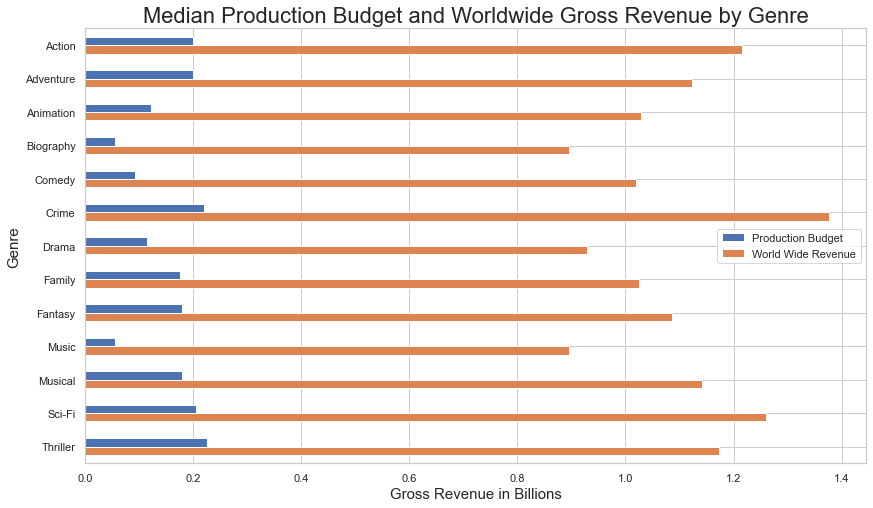

In [156]:
data     = genre_median_df
data.plot(x='genre', y=["production_budget", "worldwide_gross"], 
          kind="barh",figsize=(14,8), legend='reverse')

plt.legend((["Production Budget", "World Wide Revenue"]))

ax       = plt.gca()
ax.set_title('Median Production Budget and Worldwide Gross Revenue by Genre', fontsize=22)
plt.ylabel('Genre',fontsize=15)
plt.xlabel('Gross Revenue in Billions', fontsize=15)
ax.xaxis.offsetText.set_visible(False)
ax.invert_yaxis()


plt.show()

Although investing more in producing a film doesn't necessarily mean more returns, investing strategically on specific genres does affect the out come. The top3 genres returning the highest revenues are 'Crime', 'SciFi', and 'Action' as we have seen from our first analysis of Question 1. However, looking at this graph the top3 genres with the most production budget are 'Thriller', 'Crime', and 'Scifi', meaning although much was invested on Thriller movies, it was not even qualified to be inthe top3 highest revenue generating genres

In [157]:
movie_details_df2.describe()

,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,release_year,start_year,runtime_minutes
count,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,33.000000,33.000000,33.000000
mean,1.794121e+08,4.084434e+08,1.176263e+09,9.968511e+08,2014.939394,2014.939394,123.333333
std,6.656082e+07,1.329953e+08,2.430436e+08,2.111769e+08,2.691879,2.691879,22.496759
min,5.500000e+07,1.613218e+08,8.797651e+08,7.847651e+08,2010.000000,2010.000000,87.000000
25%,1.500000e+08,3.350618e+08,1.025491e+09,8.491029e+08,2013.000000,2013.000000,103.000000
50%,2.000000e+08,4.007380e+08,1.123062e+09,9.287905e+08,2016.000000,2016.000000,128.000000
75%,2.000000e+08,4.590059e+08,1.259200e+09,1.086336e+09,2017.000000,2017.000000,141.000000
max,3.306000e+08,7.000596e+08,2.048134e+09,1.748134e+09,2019.000000,2019.000000,165.000000


Finally going over the analysis and looking at the figures above I would recommend the most ideal investment Microsoft would profit from would be a Production Budget between the Minimum and 1st Quartile, i.e. 55million to 150million. As noticed from the table those range of budgets manage to generate a Gross profit of atleast 4 times their Production budget.

### Summary + Recommendations:
* Focus more on producing films of genre 'Crime', 'Action', and 'SciFi'
* Creating more opportunities to engage the following writers and directors
   - Rick Jaffa
   - Amanda Silver
   - Stephen McFeely
   - Christopher Markus
   - Anthony Russo
   - Joe Russo
   - Derek Connolly
   - Colin Trevorrow
   - Stan Lee
   - Jack Kirby
* Reserve a budget of 55,000,000 - 150,000,000 dollars to compete with
  some of highest earning production companies.